# Математика и Python

In [19]:
import re
import math
import numpy as np
from numpy.linalg import norm
from scipy.spatial.distance import cosine
from matplotlib import pylab as plt
from scipy.linalg import solve
from scipy import optimize
import scipy.stats as sts

###  Поиск схожих предложений

In [9]:
#Формирование словаря
def linesToWordsDict(lines,delimiter):
    words = dict()    
    for line in lines:
        for word in filter(None,re.split(delimiter,line)):
            if word not in words:
                words[word] = 0 # or 1
            else:
                words[word] += 1 
    return words

In [10]:
#Формирование матрицы вхождений
def linesToMatrix(lines,words,delimiter):
    linesCount = len(lines)
    wordsCount = len(words)
    matrix = np.zeros((linesCount,wordsCount))
    for i in range(0,linesCount,1):
        lineWords = list(filter(None,re.split(delimiter,lines[i])))
        for j in range(0,wordsCount,1):
            dictWord = list(words.keys())[j]
            for lineWord in lineWords:
                if (dictWord == lineWord):
                    matrix[i][j] +=1 
    return matrix 

In [11]:
#Поиск схожих предложения
def matchSentence (sentenceNum, matrix, n):
    cos_values = []
    out = []    
    for row in range(0,len(matrix),1):
        cos_values.append(cosine(matrix[sentenceNum],matrix[row]))
    for i in range(0,n,1):        
        val = min(cos_values)
        #ind = cos_values.ind(val)
        cos_values.remove(val)
        out.append(val)
    return out  

In [12]:
file = open('data/sentences.txt','r')
lines = file.readlines()
lines = list(map(lambda x : x.lower(),lines))
words = linesToWordsDict(lines,'[^a-z]')
matrix = linesToMatrix(lines,words,'[^a-z]')
result = matchSentence(0,matrix,3)

print (result)

[0.0, 0.7327387580875756, 0.77708871496985887]


### Решение СЛАУ

In [13]:
a = np.array([[1, 1, 6], [2, 5, 11],[3,7,14]])
b = np.array([9, 8, 7])
x = np.linalg.solve(a, b)
px, pres, pr, ps = np.linalg.lstsq(a, b)

print ("Матрица показателей A:\n", a)
print ("Вектор результатов b:\n", b)
print ("Вектор коэффициентов w = Решение системы:\n", x)
print ("Псевдо решение системы:\n", px)

#Проверка
#print (np.dot(a,x))

Матрица показателей A:
 [[ 1  1  6]
 [ 2  5 11]
 [ 3  7 14]]
Вектор результатов b:
 [9 8 7]
Вектор коэффициентов w = Решение системы:
 [-3.5 -2.5  2.5]
Псевдо решение системы:
 [-3.5 -2.5  2.5]


### Оптимизация функции

In [17]:
def f(x):   # The rosenbrock function
    return .5*(1 - x[0])**2 + (x[1] - x[0]**2)**2
    
print (f([1, 1]))

print ('Перебор ',optimize.brute(f, ((-5, 5), (-5, 5))))
print ('\nЭволюция ',optimize.differential_evolution(f, ((-5, 5), (-5, 5))))
print ('\nBFGS  ',optimize.minimize(f, [2, 2], method='BFGS'))
print ('\nНелдер-Мид  ',optimize.minimize(f, [2, 2], method='Nelder-Mead'))

0.0
Перебор  [ 0.99999324  1.00001283]

Эволюция       fun: 7.3955709864469857e-32
 message: 'Optimization terminated successfully.'
    nfev: 3243
     nit: 107
 success: True
       x: array([ 1.,  1.])

BFGS         fun: 1.78380307372662e-11
 hess_inv: array([[ 0.95489061,  1.90006631],
       [ 1.90006631,  4.27872379]])
      jac: array([  9.88094725e-07,   2.41748897e-06])
  message: 'Optimization terminated successfully.'
     nfev: 36
      nit: 8
     njev: 9
   status: 0
  success: True
        x: array([ 1.00000573,  1.00001265])

Нелдер-Мид    final_simplex: (array([[ 0.99998568,  0.99996682],
       [ 1.00002149,  1.00004744],
       [ 1.0000088 ,  1.00003552]]), array([  1.23119954e-10,   2.50768082e-10,   3.59639951e-10]))
           fun: 1.2311995365407462e-10
       message: 'Optimization terminated successfully.'
          nfev: 91
           nit: 46
        status: 0
       success: True
             x: array([ 0.99998568,  0.99996682])


### Распределение выборочных средний (Рэлей)

In [21]:
sigma = 1
mu = math.sqrt(math.pi/2)*sigma
d = (2 - math.pi/2)*sigma**2

/Users/serg_pashkov/anaconda/envs/Python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


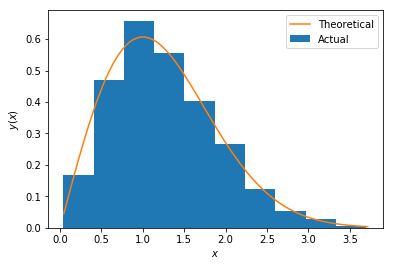

In [22]:
#Гистограма и распределение теоретической плотности
x = np.linspace(sts.rayleigh.ppf(0.001),sts.rayleigh.ppf(0.999), 1000)
y = sts.rayleigh.pdf(x,scale=sigma)
rand_y = sts.rayleigh.rvs(size=1000,scale=sigma)

plt.hist(rand_y, normed=True,label='Actual')
plt.plot(x,y,label='Theoretical')
plt.ylabel('$y(x)$')
plt.xlabel('$x$')
plt.legend()
plt.show()

/Users/serg_pashkov/anaconda/envs/Python3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


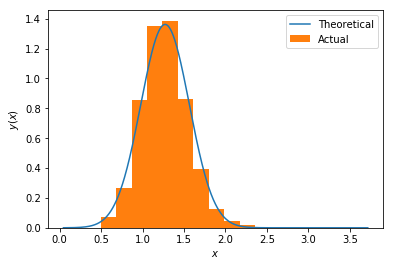

In [24]:
#Распределение выборочных средних
def avgs (arr_length, arr_count):
    avgs_arr = []
    for i in range(arr_count):
        temp_arr = np.array(sts.rayleigh.rvs(scale=sigma, size=arr_length))
        avgs_arr.append(np.average(temp_arr))
    return avgs_arr

y_avg_5 = avgs(5,1000)
mu_5 = np.average(y_avg_5)
d_5 = d/5

norm_rv5 = sts.norm(mu_5,math.sqrt(d_5))
plt.plot(x,norm_rv5.pdf(x),label='Theoretical')
plt.hist(y_avg_5, normed=True,label='Actual')
plt.ylabel('$y(x)$')
plt.xlabel('$x$')
plt.legend()
plt.show()